<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 500>
<h1 align=center><font size = 6,5>Final Project 3 (Klasifikasi Random Forest)</font></h1>

------------------------------------------------

# Kelompok 4 - PYTN KS 017

- Fadil Febriansyah  : PYTN-KS17-016 <br>
- Nabila Firzariani  : PYTN-KS17-011 <br>
- Nurhidayatul       : PYTN-KS17-008 <br>
- Riga Jaya          : PYTN-KS17-020 <br>
        
MSIB Kampus Merdeka Batch 5

----------------------------------
# A. Perkenalan

## A.1. Latar Belakang
Cardiovascular diseases (CVDs) adalah penyebab kematian nomor 1 secara global yang merenggut sekitar 17,9 juta nyawa setiap tahun, yang merupakan 31% dari semua kematian di seluruh dunia. Gagal jantung adalah kejadian umum yang disebabkan oleh CVD. Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, pola makan yang tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya dengan menggunakan strategi populasi luas.

Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan penanganan dini di mana model pembelajaran mesin dapat sangat membantu. Pada project ini, kami ingin melakukan prediksi pada kematian pasien gagal jantung dengan menggunakan konsep classification dan model ensemble.

Kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. **DEATH_EVENT** adalah variabel target untuk diprediksi, apakah pasien sudah meninggal saat waktu follow-up dengan pilihan 1:Yes dan 0:No. 


## A.2. Dataset
Analisis ini menggunakan data yang bersumber dari kaggle yaitu [Heart Failure Prediction](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)


## A.3. Objektif
Objektif yang ingin dicapai antara lain:
- Untuk mengetahui faktor-faktor yang berpengaruh dalam memprediksi keselamatan pasien dari penyakit jantung
- Untuk membuat model ensemble yang dianggap paling sesuai dengan konsep classification sehingga diperoleh akurasi yang tinggi
- Untuk memprediksi keselamatan pasien dari penyakit jantung berdasarkan faktor-faktor yang mempengaruhinya menggunakan model ensemble

# B. Import Library

In [1]:
# Import library dataframe
import numpy as np 
from numpy import mean 
import pandas as pd 

# Import library untuk visualisasi
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Import library untuk preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

# Import library untuk modelling/analysis
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error # Import library dataframe
import numpy as np 
from numpy import mean 
import pandas as pd 

# Import library untuk visualisasi
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Import library untuk preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

# Mengatur display agar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Import library untuk modelling/analysis
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from imblearn.over_sampling import SMOTE

# Import library untuk model improvement
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

# Import Library untuk balancing
from sklearn.utils import resample

# Import library untuk model improvement
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

# Mengatur display agar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')

# C. Data Loading

Data Loading adalah proses membaca atau memuat data dari file sumber, folder atau aplikasi ke database atau aplikasi serupa. Pada project ini, data loading dilakukan dengan cara import file csv.

In [2]:
data_heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
data_heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Keterangan dataset:**

Dataset ini berisi 13 kolom yang bertipe data integer, float, dan object. Masing-masing kolom memiliki arti tersendiri, yaitu sebagai berikut:

1. `age` = umur pasien (antara 40-95)
2. `anaemia` = apakah ada pengurangan haemoglobin (Yes:1, No:0)
3. `creatinine_phosphokinase` = level enzim CPK dalam mcg/L
4. `diabetes` = apakah pasien punya riwayat diabetes (Yes:1, No:0)
5. `ejection_fraction` = persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. `high_blood_pressure` = apakah pasien punya darah tinggi (Yes:1, No:0)
7. `platelets` = jumlah platelet di darah dalam kiloplatelets/mL
8. `serum_creatinine` = level serum creatinine di darah dalam mg/dL
9. `serum_sodium` = level serum sodium di darah dalam mEq/L
10. `sex` = apakah pasien pria atau wanita (Male:1, Female:0)
11. `smoking` = apakah pasien merokok (Yes:1, No:0)
12. `time` = waktu dalam hari untuk follow-up
13. `DEATH_EVENT` = apakah pasien sudah meninggal saat waktu follow-up (Yes:1, No:0)

## Melihat ukuran dataset

In [4]:
data_heart.shape

(299, 13)

## Deskriptif Statistik

In [5]:
data_heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Mengecek info dataset ada kolom apa saja , mengecek type data, dll

In [6]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# D.Data Cleaning

Data cleaning (pembersihan data) adalah proses mengidentifikasi, mengkoreksi, dan menghapus kesalahan, ketidakcocokan, atau ketidaksesuaian dalam dataset agar data tersebut dapat digunakan dengan akurat dan andal dalam analisis, pemodelan, atau keperluan lainnya. Data cleaning adalah langkah penting dalam analisis data dan pengolahan data karena data yang tidak bersih atau cacat dapat menghasilkan hasil yang tidak benar dan tidak dapat diandalkan. 

## Pengecekan missing value

In [7]:
data_heart.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Pengecekan data duplikat

In [8]:
data_heart.duplicated().sum()

0

Mengecek tipe data datetime

In [9]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Kesimpulan dari proses Data Cleaning

Dataset secara keseluruhan data tidak memiliki missing value dan tidak memiliki data yang duplikat


# Exploratory Data Analysis

Exploratory Data Analysis (EDA) adalah metode eksplorasi data yang menggabungkan teknik statistik dan visualisasi data untuk memahami karakteristik, pola, dan hubungan dalam data. EDA membantu analis data merumuskan pemahaman awal tentang data sebelum melangkah ke tahap analisis lebih mendalam. Ini mencakup perhitungan statistik deskriptif, seperti rata-rata dan median, serta teknik visualisasi, seperti histogram dan scatter plot, untuk menggambarkan data dengan lebih baik dan mengidentifikasi tren, outlier, dan pertanyaan penelitian potensial. EDA adalah tahap awal penting dalam analisis data.

## 1. Visualisasi Data

### 1. apakah pasien yang meninggal karena penyakit jantung lebih banyak antara yang selamat

In [10]:
# Hitung jumlah pasien yang meninggal dan selamat
death_count = data_heart['DEATH_EVENT'].value_counts()

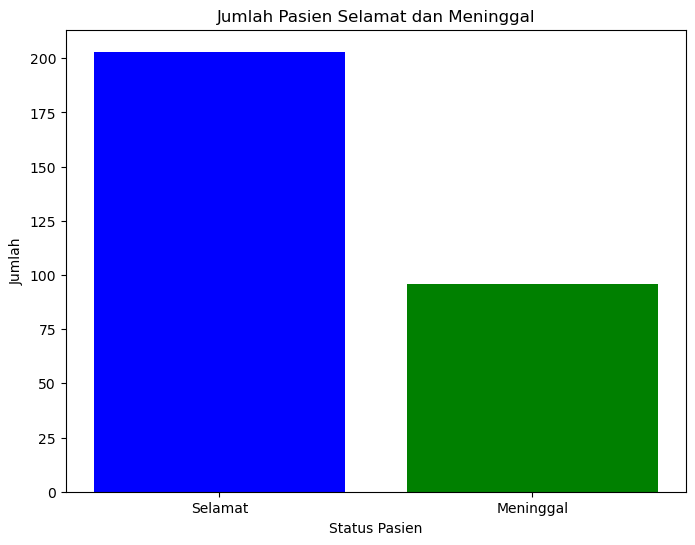

In [11]:
# Buat diagram batang
plt.figure(figsize=(8, 6))
plt.bar(death_count.index, death_count.values, color=['blue', 'green'])
plt.xticks([0, 1], ['Selamat', 'Meninggal'])
plt.xlabel('Status Pasien')
plt.ylabel('Jumlah')
plt.title('Jumlah Pasien Selamat dan Meninggal')
plt.show()

Pada Grafik diatas jumlah pasien yang meninggal akibat gagal jantung sebanyak 96, dan sedangkan pasien yang selamat terdapat 203.

kesimpulan:

Ternyata pasien yang selamat lebih besar dibandingkan pasien yang meninggal, dan grafik diatas bahwa pasien yang meniggal sedikit

### 2. perbandingan antara pasien pria dan wanita yang mengalami gagal jantung dan penyakit jantung

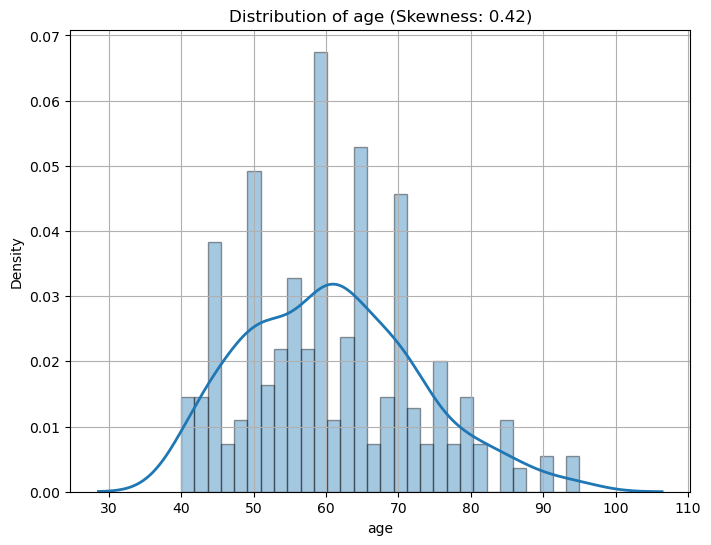

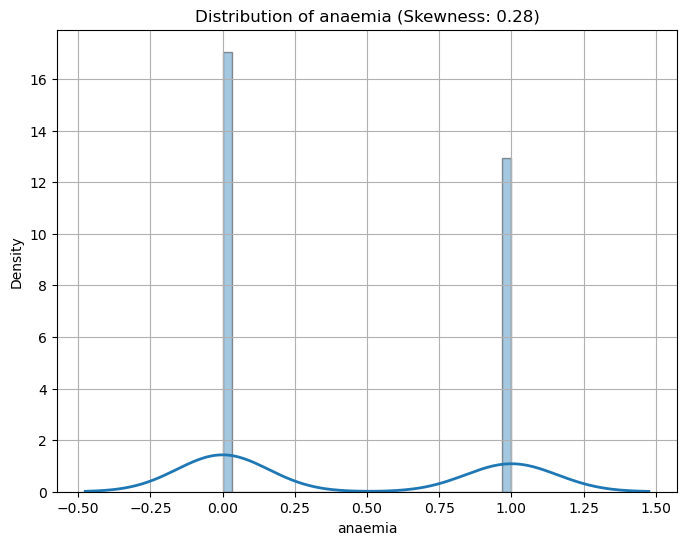

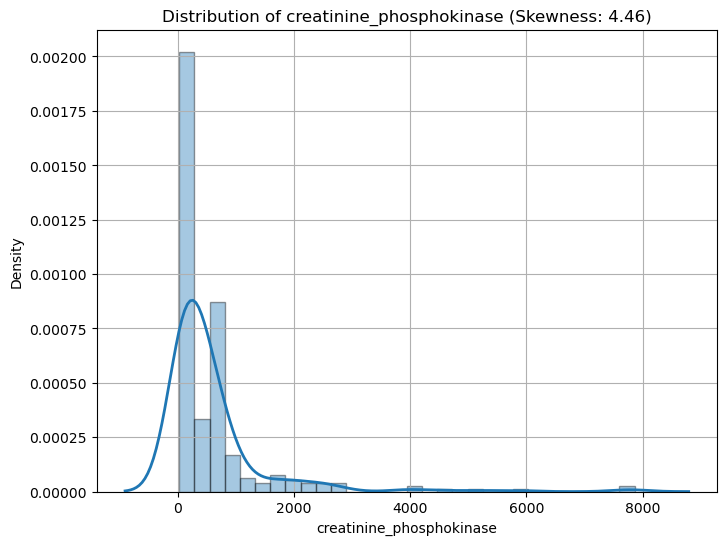

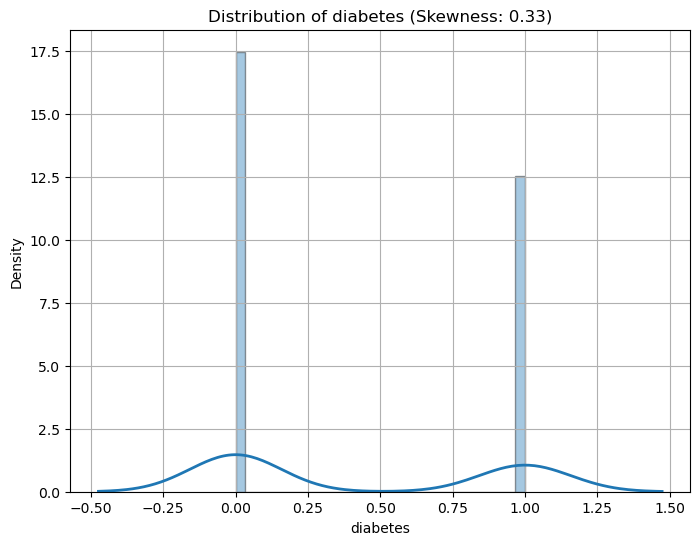

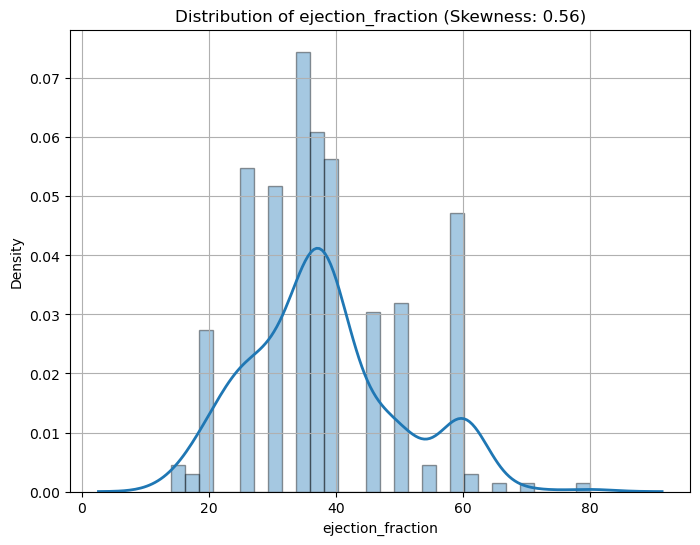

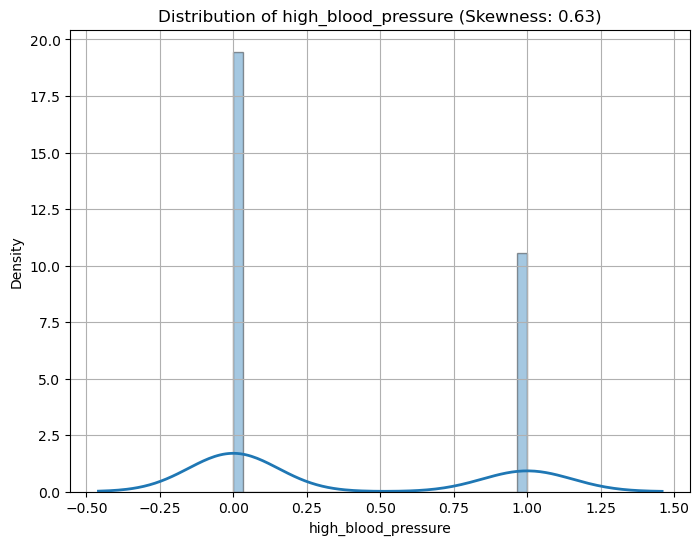

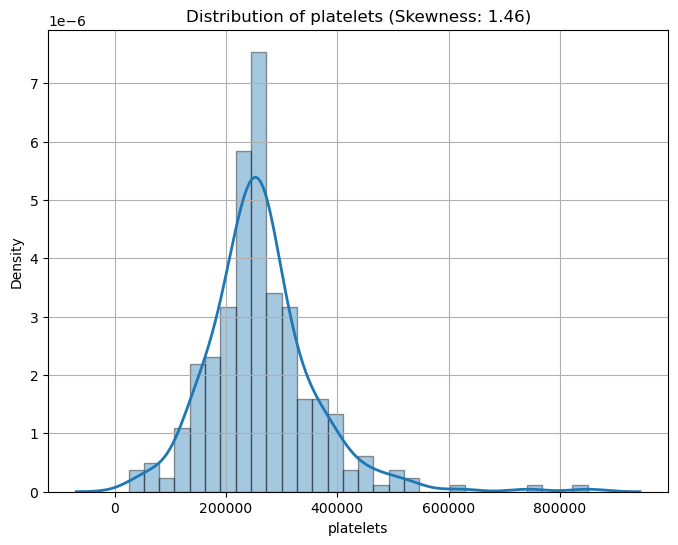

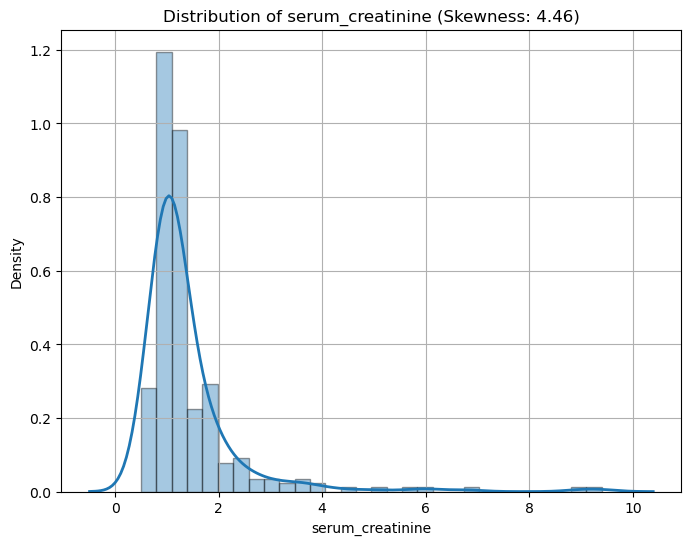

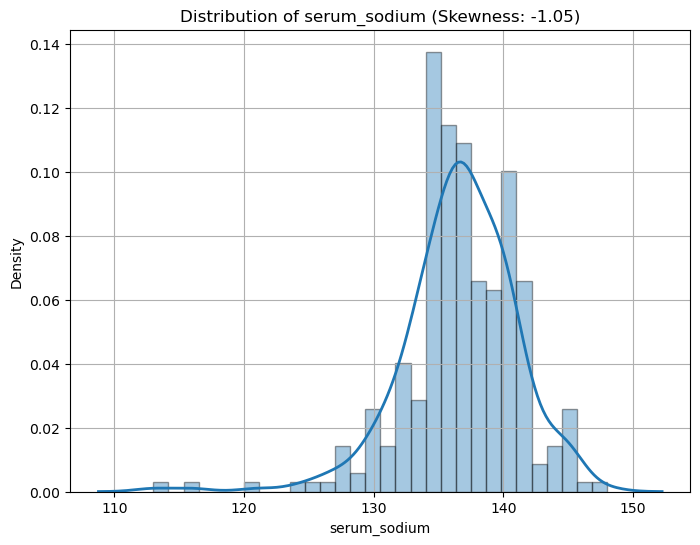

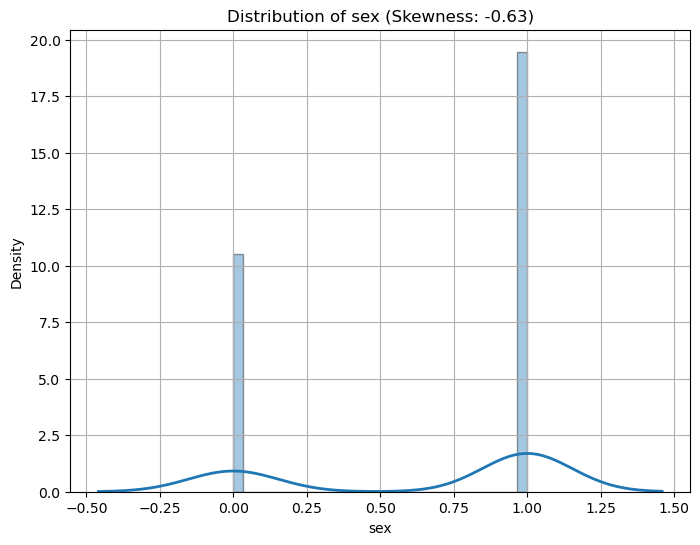

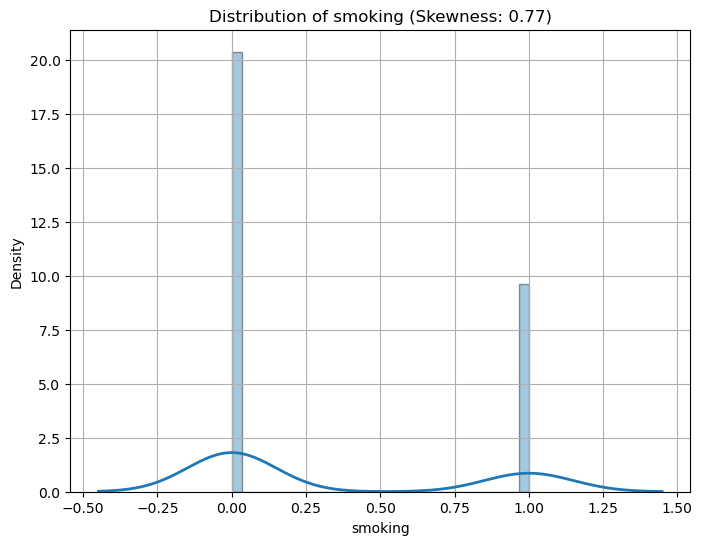

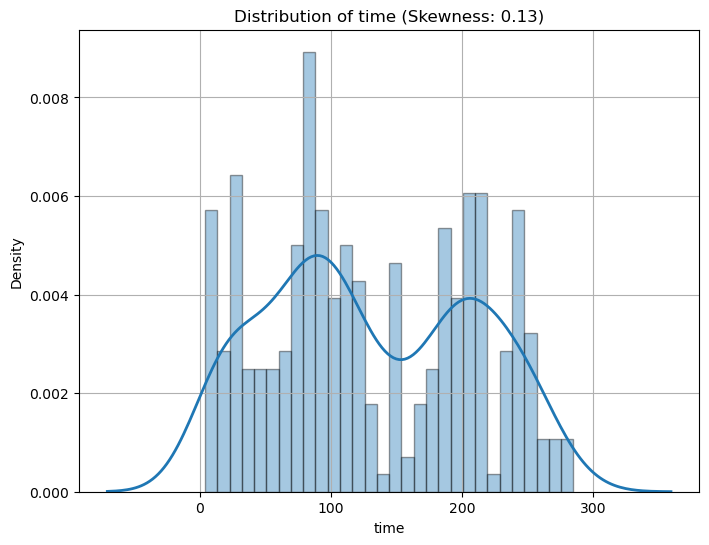

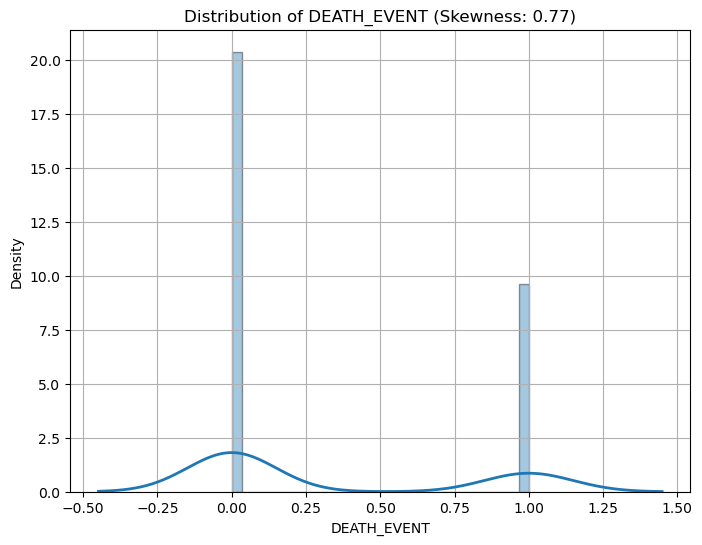

In [12]:
# Mengecek skewness dan membuat histogram untuk setiap attribut yang ada
for column in data_heart:
    skewness = data_heart[column].skew()
    plt.figure(figsize=(8, 6))
    sns.distplot(data_heart[column], bins=30, hist=True, kde=True, rug=False,
                 hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2})
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title('Distribution of {} (Skewness: {:.2f})'.format(column, skewness))
    plt.grid(True)
    plt.show()

In [13]:
# Hitung jumlah pasien pria dan wanita yang menderita gagal jantung
gender_failure_count = data_heart[data_heart['DEATH_EVENT'] == 1]['sex'].value_counts()

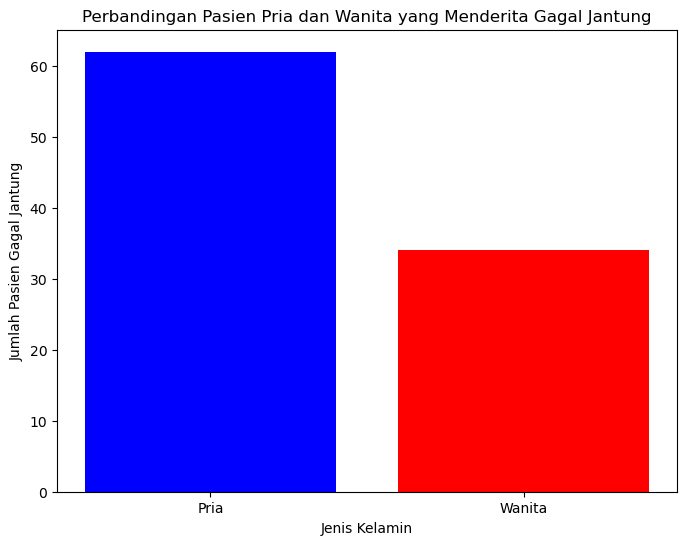

In [14]:
# Ubah kode jenis kelamin menjadi keterangan yang lebih deskriptif
gender_failure_count.index = gender_failure_count.index.map({0: 'Wanita', 1: 'Pria'})

# Buat diagram batang
plt.figure(figsize=(8, 6))
plt.bar(gender_failure_count.index, gender_failure_count.values, color=['blue', 'red'])
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pasien Gagal Jantung')
plt.title('Perbandingan Pasien Pria dan Wanita yang Menderita Gagal Jantung')
plt.show()

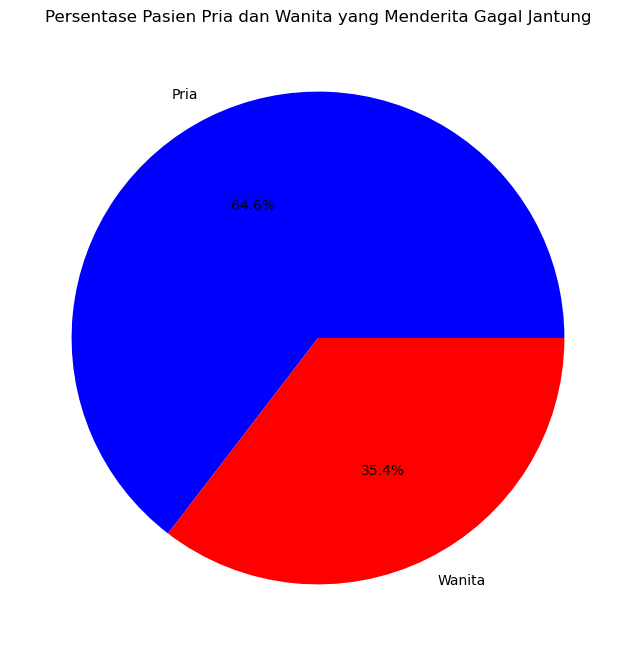

In [15]:
# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_failure_count, labels=gender_failure_count.index, autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Persentase Pasien Pria dan Wanita yang Menderita Gagal Jantung')
plt.show()

**Kesimpulan** 

Berdasarkan visualisasi diatas, maka dapat disimpulkan bahwa perbadingan pasien pria atau wanita yang mengalami gagal jatung, lebih besar pasien pria dibandingkan dengan pasien wanta. Selain itu, diperoleh informasi bahwa:
1. pria 
    - Banyaknya pasien pria yang mengalami gagal jantung terdapat 62 jiwa  <br>
    - Dan presentase yang di dapatkan oleh pasien pria adalah 64.6%  <br>
2. wanita 
    - Sedangkan banyaknya pasien wanita yang mengalami gagal jantung terdapat 34 jiwa  <br>
    -  Dengan presentase yang di dapatkan oleh pasien wanita adalah 35.4%  <br>

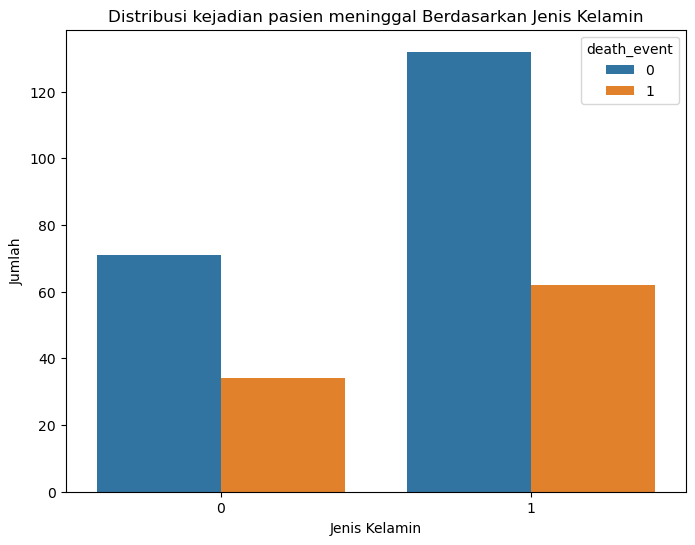

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='DEATH_EVENT', data=data_heart)
plt.title('Distribusi kejadian pasien meninggal Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.legend(title='death_event', loc='upper right')
plt.show()

Berdasarkan visualisasi tersebut dapat dilihat bahwa terdapat banyak pasien dengan jenis kelamin laki-laki dibandingkan dengan pasien wanita serta dari visualisasi tersebut dapat dilihat bahwa pasien yang meninggal lebih banyak baik itu wanita ataupun laki-laki.

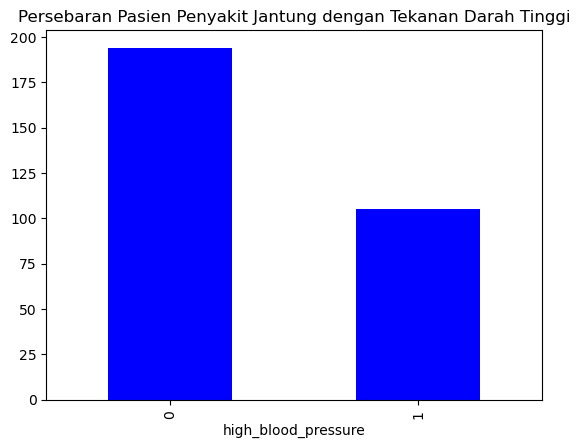

In [17]:
data_heart['high_blood_pressure'].value_counts().plot.bar(color='blue')
plt.title('Persebaran Pasien Penyakit Jantung dengan Tekanan Darah Tinggi')
plt.show()

Pasien yang penyakit jantung yang mengalami tekanan darah tinggi  lebih sedikit dibanding yang tidak mengalami. Terdapat sekitar 190 pasien yang tidak mengalami tekanan darah tinggi dan sekitar 100 pasien mengalami tekanan darah tinggi.

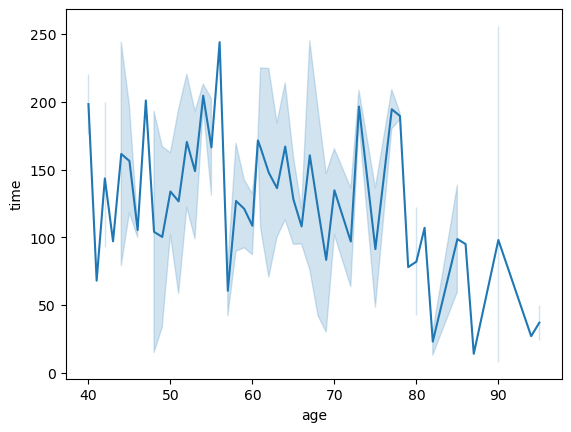

In [18]:
sns.lineplot(x='age', y='time', data=data_heart)
plt.show()

## E.2. Analisis Korelasi
Analisis korelasi merupakan salah satu teknik statistik yang digunakan untuk menganalisis hubungan antara dua variabel atau lebih yang bersifat kuantitatif. Bahwa adanya perubahan sebuah variabel disebabkan atau akan diikuti dengan perubahan variabel lain.

#### 2.2. Membuat visualisasi heatmap berdasarkan df_cor

In [19]:
# Membuat fungsi heat_map dengan 2 parameter
# nama df adalah nama datasetnya, list kolom adalah list korelasi yang ingin di cek
def heat_map(nama_df,list_kolom): 
    df_heatmap = nama_df[list_kolom] #Memasukkan data kolom tersebut kedalam variabel baru
    plt.figure(figsize=(20,23)) #Mengatur ukuran
    
    #Membuat heat map dengan menampilkan nilai dari korelasi
    sns.heatmap(df_heatmap.corr(), 
                annot=True, 
                cmap="pink", 
                linewidths=.5, 
                linecolor='black', 
                square=True) 

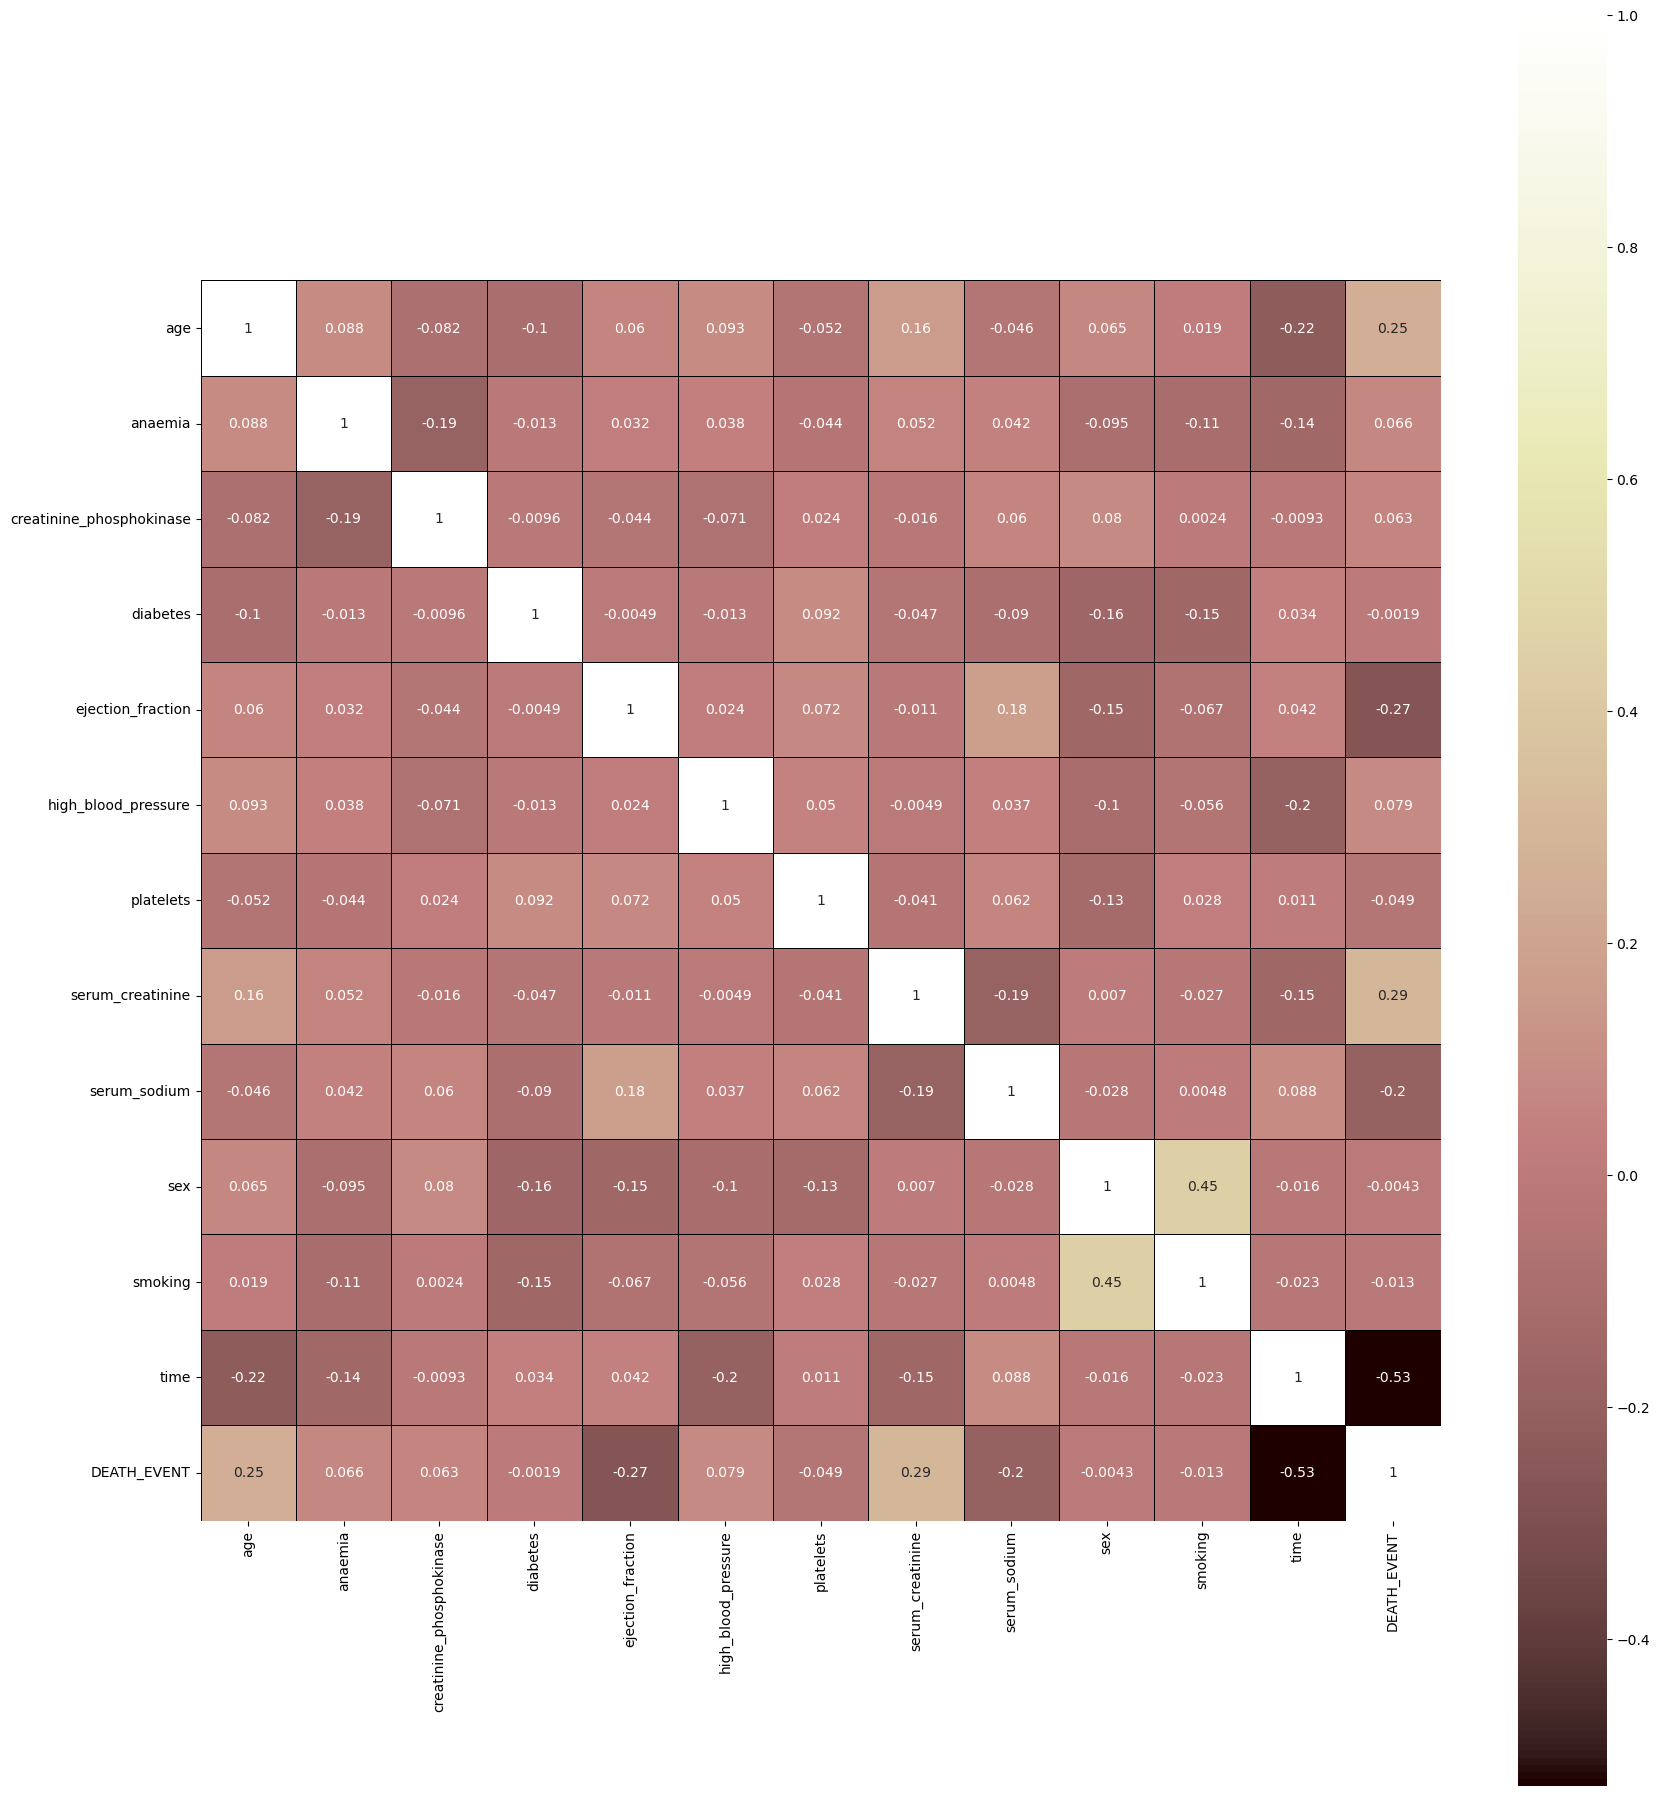

In [20]:
heat_map_modeling = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 
                     'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time','DEATH_EVENT']
heat_map(data_heart, heat_map_modeling)

**Keterangan:**

Berdasarkan heatmap, dipilih beberapa kolom yang memiliki korelasi cukup tinggi yang kemudian nantinya digunakan untuk variabel X dan Y pada modelling. Kolom tersebut diantaranya adalah sebagai berikut:
1. `age` - dengan korelasi 0.25
2. `anaemia` - dengan korelasi 0.066
3. `creatinine_phosphokinase` - dengan korelasi 0.063 
4. `high_blood_pressure` - dengan korelasi 0.079
5. `serum_creatinine` - dengan korelasi 0.29
6. `DEATH_EVENT` - dengan korelasi 1.00

# F. Mencari Central Tendency & Measure of Spread 
1. Central Tendency merupakan nilai yang menunjukkan titik tengah dari suatu dataset untuk mengetahui dimana posisi banyak nilai data berkumpul di dalam distribusi. Nilai Mean, Median, dan Modus adalah ukuran Central Tendency yang paling umum digunakan. 
2. Measures of Spread didefinisikan sebagai cara untuk mendeskripsikan data dengan menjelaskan seberapa menyebar data kita. Cara yang sering digunakan adalah range, varian, dan standar deviasi.

Pada project ini, kami menggunakan kolom yang sudah dipilih dengan tipe data integer untuk dicari central tendency dan Measure of Spread nya.

In [21]:
df_central = data_heart.loc[:,['age', 'ejection_fraction', 'serum_creatinine', 'platelets']]
df_central.head()


,age,ejection_fraction,serum_creatinine,platelets
0,75.0,20,1.9,265000.00
1,55.0,38,1.1,263358.03
2,65.0,20,1.3,162000.00
3,50.0,20,1.9,210000.00
4,65.0,20,2.7,327000.00


In [22]:
#Menghitung mean, median, modus, range, variansi, dan Standard Deviasi
for column in df_central:
    mean = df_central[column].mean()
    median = df_central[column].median()
    mode = df_central[column].mode()[0]
    min_value = df_central[column].min()
    max_value = df_central[column].max()
    range_value = max_value - min_value
    variance = df_central[column].var()
    std_dev = df_central[column].std()
    
#Print hasilnya
    print(f"Nama Kolom: {column}")
    print(f"Mean: {mean:.3f}")
    print(f"Median: {median:.3f}")
    print(f"Modus: {mode:.3f}")
    print(f"Range: {range_value:.3f}")
    print(f"Variansi: {variance:.3f}")
    print(f"Standard Deviasi: {std_dev:.3f}")
    print("  ")

Nama Kolom: age
Mean: 60.834
Median: 60.000
Modus: 60.000
Range: 55.000
Variansi: 141.486
Standard Deviasi: 11.895
  
Nama Kolom: ejection_fraction
Mean: 38.084
Median: 38.000
Modus: 35.000
Range: 66.000
Variansi: 140.063
Standard Deviasi: 11.835
  
Nama Kolom: serum_creatinine
Mean: 1.394
Median: 1.100
Modus: 1.000
Range: 8.900
Variansi: 1.070
Standard Deviasi: 1.035
  
Nama Kolom: platelets
Mean: 263358.029
Median: 262000.000
Modus: 263358.030
Range: 824900.000
Variansi: 9565668749.449
Standard Deviasi: 97804.237
  


Pada data central  masing-masing kolom terdapat nilai mean,median,modus,range,variansi,dan stadart deviasi yang berbebeda hasilnya

# G. Cardinality

Cardinality / Kardinalitas adalah ukuran keunikan data pada kolom tertentu dari suatu table database. Tujuan kita adalah mengurangi cardinality untuk membuat model yang lebih konsisten dan tidak over-fit. Kita memastikan semua label unik yang ada pernah dilihat model saat training.

In [23]:
df_card = data_heart.loc[:,['age', 'anaemia', 'ejection_fraction', 'diabetes', 'serum_creatinine', 'serum_sodium', 'platelets', 'creatinine_phosphokinase', 'high_blood_pressure', 'DEATH_EVENT']]
df_card.head()

,age,anaemia,ejection_fraction,diabetes,serum_creatinine,serum_sodium,platelets,creatinine_phosphokinase,high_blood_pressure,DEATH_EVENT
0,75.0,0,20,0,1.9,130,265000.00,582,1,1
1,55.0,0,38,0,1.1,136,263358.03,7861,0,1
2,65.0,0,20,0,1.3,129,162000.00,146,0,1
3,50.0,1,20,0,1.9,137,210000.00,111,0,1
4,65.0,1,20,1,2.7,116,327000.00,160,0,1


In [24]:
df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   ejection_fraction         299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   serum_creatinine          299 non-null    float64
 5   serum_sodium              299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   creatinine_phosphokinase  299 non-null    int64  
 8   high_blood_pressure       299 non-null    int64  
 9   DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 23.5 KB


In [25]:
print('Jumlah kategori dalam variabel age                         : {}'.format(len(df_card.age.unique())))
print('Jumlah kategori dalam variabel anaemia                     : {}'.format(len(df_card.anaemia.unique())))
print('Jumlah kategori dalam variabel ejection_fraction           : {}'.format(len(df_card.ejection_fraction.unique())))
print('Jumlah kategori dalam variabel diabetes                    : {}'.format(len(df_card.diabetes.unique())))
print('Jumlah kategori dalam variabel serum_creatinine            : {}'.format(len(df_card.serum_creatinine.unique())))
print('Jumlah kategori dalam variabel serum_sodium                : {}'.format(len(df_card.serum_sodium.unique())))
print('Jumlah kategori dalam variabel platelets                   : {}'.format(len(df_card.platelets.unique())))
print('Jumlah kategori dalam variabel creatinine_phosphokinase    : {}'.format(len(df_card.creatinine_phosphokinase.unique())))
print('Jumlah kategori dalam variabel high_blood_pressure         : {}'.format(len(df_card.high_blood_pressure.unique())))
print('Jumlah kategori dalam variabel DEATH_EVENT                 : {}'.format(len(df_card.DEATH_EVENT.unique())))

Jumlah kategori dalam variabel age                         : 47
Jumlah kategori dalam variabel anaemia                     : 2
Jumlah kategori dalam variabel ejection_fraction           : 17
Jumlah kategori dalam variabel diabetes                    : 2
Jumlah kategori dalam variabel serum_creatinine            : 40
Jumlah kategori dalam variabel serum_sodium                : 27
Jumlah kategori dalam variabel platelets                   : 176
Jumlah kategori dalam variabel creatinine_phosphokinase    : 208
Jumlah kategori dalam variabel high_blood_pressure         : 2
Jumlah kategori dalam variabel DEATH_EVENT                 : 2


1. Age (Usia): Terdapat 47 kategori usia yang berbeda. Ini menunjukkan variasi yang signifikan dalam rentang usia pasien dalam dataset Anda. Pengelompokan atau binning usia menjadi kategori yang lebih kecil mungkin dapat membantu dalam analisis atau model.

2. Anaemia: Variabel Anaemia hanya memiliki 2 kategori, yang menunjukkan bahwa mayoritas pasien dalam dataset ini mungkin hanya memiliki dua kemungkinan kondisi, yaitu anaemia atau tidak.

3. Ejection Fraction (Fraksi Ejeksi): Memiliki 17 kategori menunjukkan variasi dalam fraksi ejeksi jantung pasien dalam dataset. Fraksi ejeksi mengukur seberapa baik jantung memompa darah. Jumlah kategori yang cukup banyak ini dapat menggambarkan variasi kondisi jantung dalam dataset.

4. Diabetes: Seperti variabel anaemia, diabetes juga hanya memiliki 2 kategori. Ini mengindikasikan bahwa mayoritas pasien dalam dataset memiliki kondisi diabetes atau tidak.

5. Serum Creatinine (Kreatinin Serum): Dengan 40 kategori, ini menunjukkan variasi yang cukup signifikan dalam konsentrasi kreatinin serum dalam darah pasien. Konsentrasi kreatinin serum dapat memberikan indikasi tentang fungsi ginjal.

6. Serum Sodium (Natrium Serum): Memiliki 27 kategori, menunjukkan variasi dalam konsentrasi natrium serum dalam darah pasien. Konsentrasi natrium serum penting dalam menjaga keseimbangan cairan dalam tubuh.

7. Platelets (Trombosit): Dengan 176 kategori, ini menunjukkan variasi yang sangat besar dalam jumlah trombosit dalam darah pasien. Jumlah kategori yang tinggi bisa menggambarkan variasi yang luas dalam kondisi medis pasien.

8. Creatinine Phosphokinase (CPK): Memiliki 208 kategori, menunjukkan variasi yang sangat besar dalam enzim CPK dalam darah pasien. Ini dapat menggambarkan variasi yang luas dalam kondisi otot atau jantung.

9. High Blood Pressure (Tekanan Darah Tinggi): Seperti variabel anaemia dan diabetes, variabel tekanan darah tinggi juga hanya memiliki 2 kategori, yang menunjukkan mayoritas pasien dalam dataset mungkin memiliki tekanan darah tinggi atau tidak.

10. Death Event (Peristiwa Kematian): Seperti variabel anaemia, diabetes, dan tekanan darah tinggi, variabel ini hanya memiliki 2 kategori. Ini mengindikasikan bahwa mayoritas pasien dalam dataset mengalami peristiwa kematian atau tidak.

dengan begitu dapat ditarik kesimpulan bahwa beberapa kolom memiliki variasi/kardinalitas yang besar dalam kategori, sementara yang lain memiliki kardinalitas yang rendah dengan memiliki 2 kategori

**Keterangan:**

Dapat dilihat bahwa jumlah kategori (unique value) dari platelets dan creatinine_phosphokinase sangat banyak atau biasa disebut dengan istilah high cardinality. 

In [26]:
df_central.head()

,age,ejection_fraction,serum_creatinine,platelets
0,75.0,20,1.9,265000.00
1,55.0,38,1.1,263358.03
2,65.0,20,1.3,162000.00
3,50.0,20,1.9,210000.00
4,65.0,20,2.7,327000.00


In [27]:
print('Jumlah kategori dalam variabel age                         : {}'.format(len(df_card.age.unique())))
print('Jumlah kategori dalam variabel ejection_fraction           : {}'.format(len(df_card.ejection_fraction.unique())))
print('Jumlah kategori dalam variabel serum_creatinine            : {}'.format(len(df_card.serum_creatinine.unique())))
print('Jumlah kategori dalam variabel platelets                   : {}'.format(len(df_card.platelets.unique())))

Jumlah kategori dalam variabel age                         : 47
Jumlah kategori dalam variabel ejection_fraction           : 17
Jumlah kategori dalam variabel serum_creatinine            : 40
Jumlah kategori dalam variabel platelets                   : 176


# I. Analisis

Pada tahap ini berisi beberapa kondisi yang kami buat dengan tujuan untuk memaksimalkan hasil modelling nanti beserta tahapan-tahapan lainnya agar kondisi-kondisi tersebut semakin optimal. Diantaranya adalah mengindentifikasi data, menghandle outliers, dan menghitung nilai kuartil.

## J.1. Kondisi 
Memilih kolom dengan korelasi paling tinggi berdasarkan analisis korelasi yang telah dilakukan. Kolom yang dipilih sudah melalui proses encoding, undersampling dan feature scaling.

In [28]:
df_kondisi = df_card.copy()
df_kondisi.head()

,age,anaemia,ejection_fraction,diabetes,serum_creatinine,serum_sodium,platelets,creatinine_phosphokinase,high_blood_pressure,DEATH_EVENT
0,75.0,0,20,0,1.9,130,265000.00,582,1,1
1,55.0,0,38,0,1.1,136,263358.03,7861,0,1
2,65.0,0,20,0,1.3,129,162000.00,146,0,1
3,50.0,1,20,0,1.9,137,210000.00,111,0,1
4,65.0,1,20,1,2.7,116,327000.00,160,0,1


In [29]:
df_kondisi.shape

(299, 10)

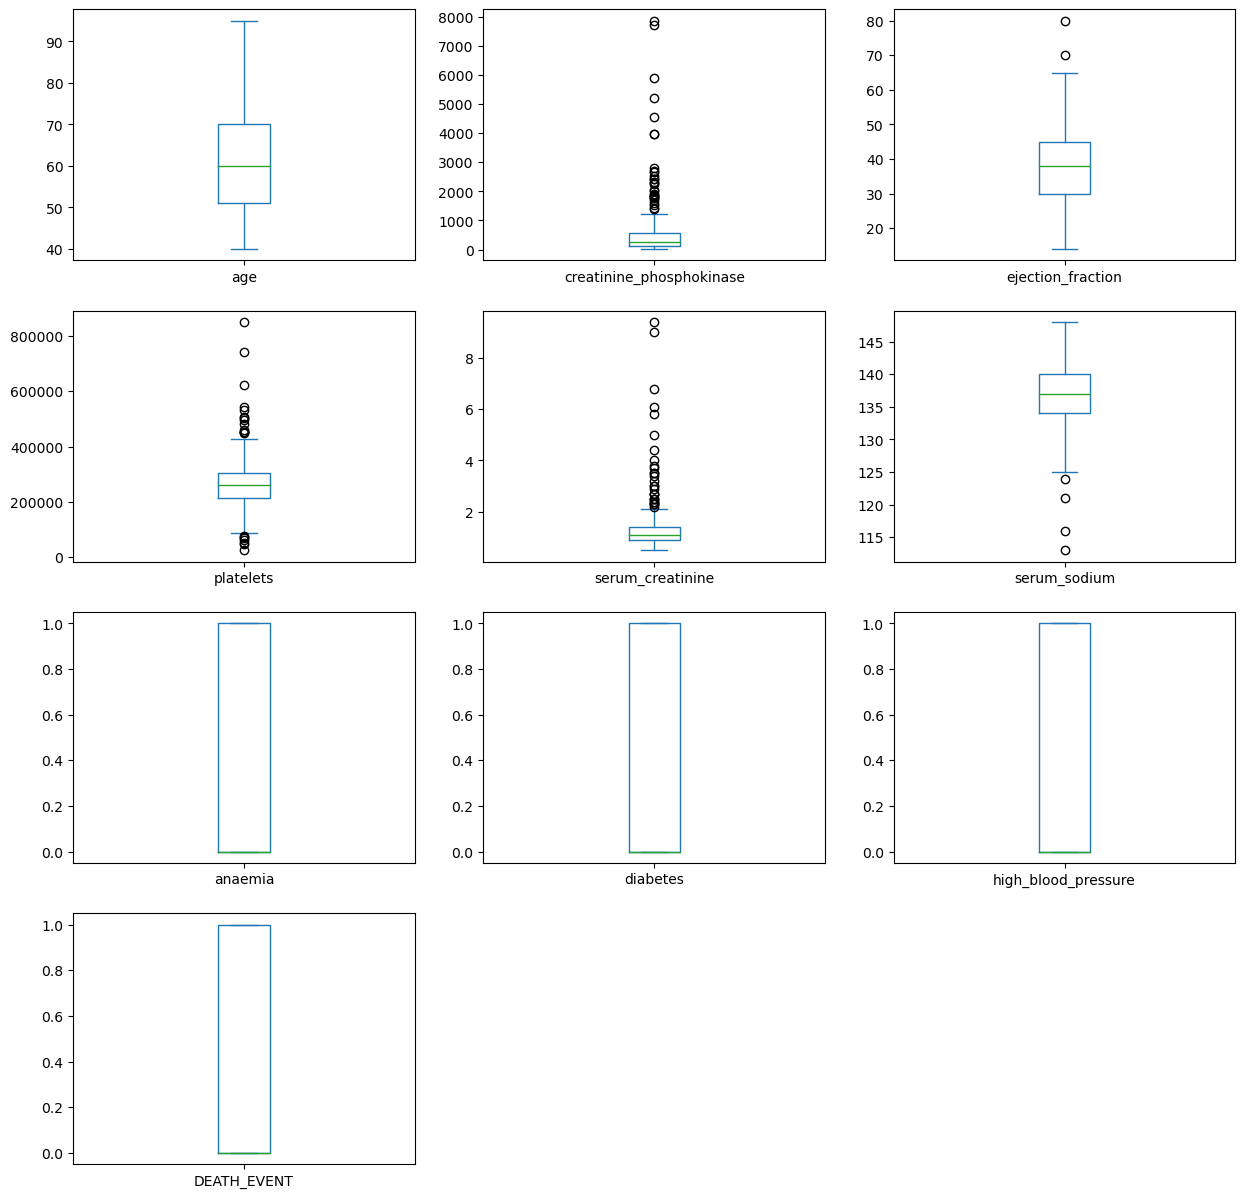

In [30]:
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(4,3,1)
ax2=fig.add_subplot(4,3,2)
ax3=fig.add_subplot(4,3,3)
ax4=fig.add_subplot(4,3,4)
ax5=fig.add_subplot(4,3,5)
ax6=fig.add_subplot(4,3,6)
ax7=fig.add_subplot(4,3,7)
ax8=fig.add_subplot(4,3,8)
ax9=fig.add_subplot(4,3,9)
ax10=fig.add_subplot(4,3,10)

df_kondisi.age.plot(kind='box', ax=ax1)
df_kondisi.creatinine_phosphokinase.plot(kind='box', ax=ax2)
df_kondisi.ejection_fraction.plot(kind='box', ax=ax3)
df_kondisi.platelets.plot(kind='box', ax=ax4)
df_kondisi.serum_creatinine.plot(kind='box', ax=ax5)
df_kondisi.serum_sodium.plot(kind='box', ax=ax6)
df_kondisi.anaemia.plot(kind='box', ax=ax7)
df_kondisi.diabetes.plot(kind='box', ax=ax8)
df_kondisi.high_blood_pressure.plot(kind='box', ax=ax9)
df_kondisi.DEATH_EVENT.plot(kind='box', ax=ax10)
plt.show()

Berdasarkan visualisasi box plot diatas, terdapat beberapa kolom yang memiliki outlier. Tetapi hanya ada 3 kolom yang memiliki outlier tinggi, yaitu creatinine, platelets dan serum_creatinine. Untuk meminimalisir tejadinya outlier, maka akan dilakukan teknik untuk menghandling outlier pada ketiga kolom tersebut. Cara yang dilakukan adalah kita menghapus nilai outliernya berdasarkan range nilai tertentu.

Mengidentifikasi data apakah berdistribusi normal atau skewness

In [31]:
# Membuat fungsi untuk visualisasi histogram dan boxplot dengan 2 parameter
def diagnostic_plots(df_kondisi, variable):
    # Mengatur ukuran
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_kondisi[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_kondisi[variable])
    plt.title('Boxplot')

    plt.show()

In [32]:
df_kondisi['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [33]:
select = df_kondisi[['DEATH_EVENT']]
select.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


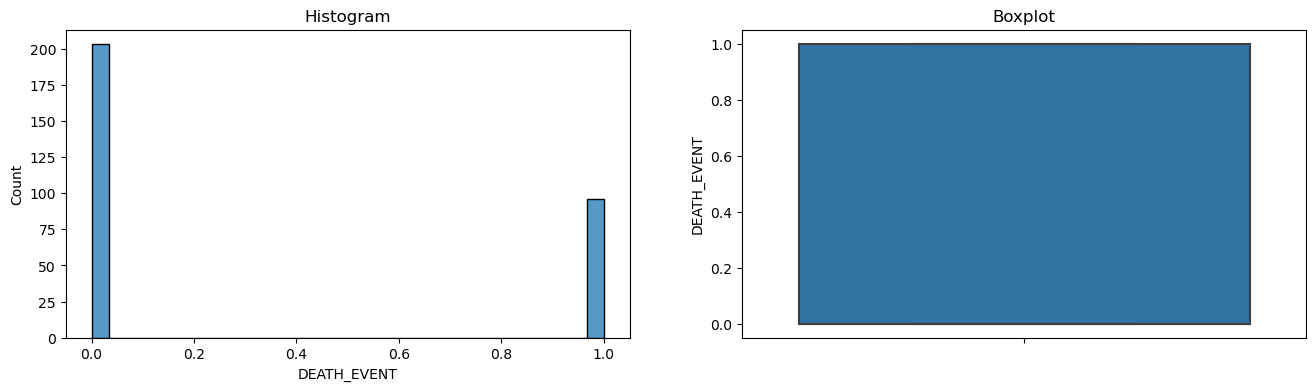

Skewness Value :  0.7703488154389491


In [34]:
diagnostic_plots(select, 'DEATH_EVENT')
print('Skewness Value : ', select['DEATH_EVENT'].skew())

Ternyata data tersebut memiliki Skewness Value yang relatif kecil yaitu sebesar 0.77, selanjutnya cek outliersnya.

In [35]:
# Mencari tahu data yang outliers dengan mendefinisikan fungsi
def outliers(data_out, drop = False):
    columns = data_out.select_dtypes(include=np.number).columns.tolist()
    for each_feature in columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('Pada kolom {}, jumlah outliernya adalah {}'.format(each_feature, len(outliers)))
        if drop:
            data_out.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

In [36]:
outliers(df_kondisi, drop=True)

Outliers from age feature removed
Outliers from anaemia feature removed
Outliers from ejection_fraction feature removed
Outliers from diabetes feature removed
Outliers from serum_creatinine feature removed
Outliers from serum_sodium feature removed
Outliers from platelets feature removed
Outliers from creatinine_phosphokinase feature removed
Outliers from high_blood_pressure feature removed
Outliers from DEATH_EVENT feature removed


Tampilan dari beberapa kolom yang sudah dilakukan removing untuk outliersnya, yang mana sebelumnya masih terdapat outliers pada kolom tersebut

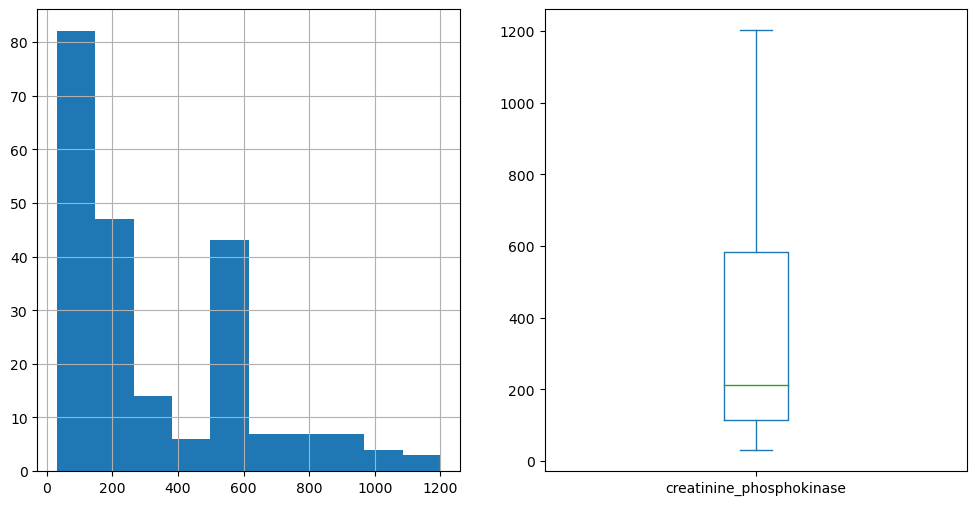

In [37]:
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
df_kondisi.creatinine_phosphokinase.hist(ax=ax1)
df_kondisi.creatinine_phosphokinase.plot(kind='box', ax=ax2)
plt.show()

Pada category creatine_phosphokinase terdapat grafik tertinggi mencapai yaitu 82,5 dan grafik terkcil pada category ini yaitu 3.7 dan pada boxplot diatas Pada boxplot diatas yaitu pada kondisi1 dengan garis yang ditengah dan yang diatas merupakan maximum values dengan nilai 1202 dan bawah merupakan minumum values dengan nilai 30, dan garis yang diapit oleh nilai Q3 dan Q1 adalah nilai median yang berada di 211 

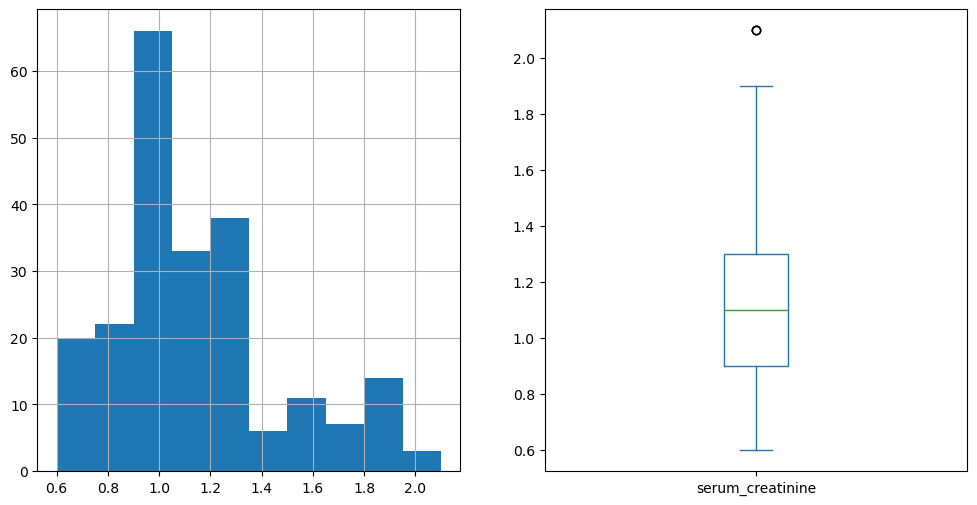

In [38]:
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
df_kondisi.serum_creatinine.hist(ax=ax1)
df_kondisi.serum_creatinine.plot(kind='box', ax=ax2)
plt.show()

Pada category serum creatinine terdapat grafik tertinggi mencapai yaitu 60,5 dan grafik terkcil pada category ini yaitu 5 dan pada boxplot diatas Pada boxplot diatas yaitu pada kondisi dengan garis yang ditengah dan yang diatas merupakan maximum values berada pada angka 1.9 dan bawah merupakan minumum values berada pada angka 0.5, dan garis yang diapit oleh nilai Q3 dan Q1 adalah nilai median yang berada di angka 1.1

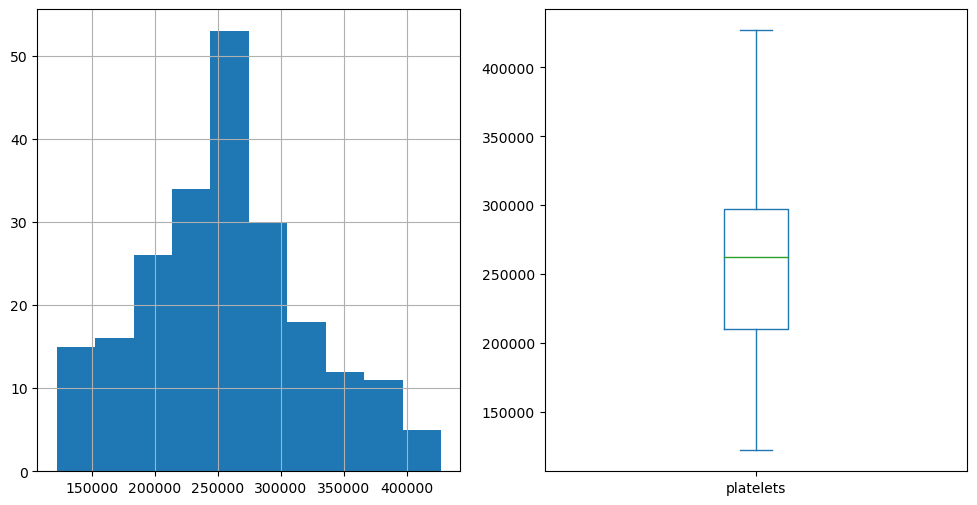

In [39]:
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
df_kondisi.platelets.hist(ax=ax1)
df_kondisi.platelets.plot(kind='box', ax=ax2)
plt.show()

Pada category platelets terdapat grafik tertinggi mencapai yaitu 50,5 dan grafik terkcil pada category ini yaitu 5.5 dan pada boxplot diatas Pada boxplot diatas yaitu pada kondisi dengan garis yang ditengah dan yang diatas merupakan maximum values dengan nilai 427000 dan bawah merupakan minumum values dengan nilai 122000, dan garis yang diapit oleh nilai Q3 dan Q1 adalah nilai median yang berada di 262500 

In [40]:
from scipy.stats import skew

Skewness dari atribut "age" adalah 0.42


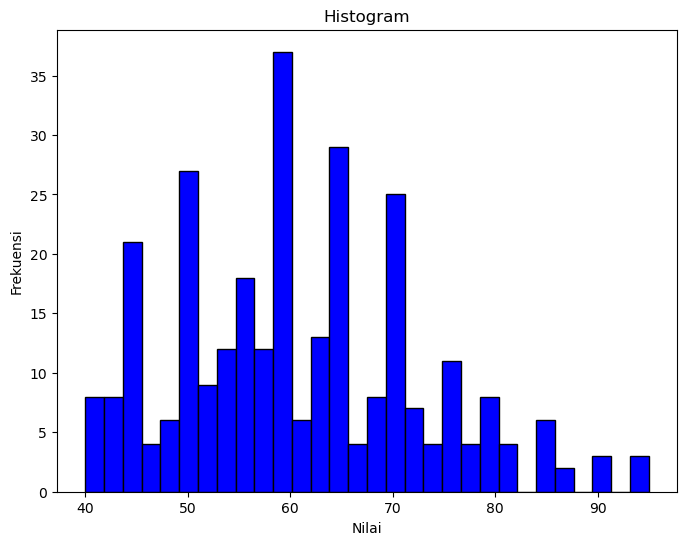

In [41]:
# Pilih atribut klinis yang akan dievaluasi
selected_attribute = 'age'

# Hitung skewness
skewness = skew(df_card[selected_attribute])

# Tampilkan hasil skewness
print(f'Skewness dari atribut "{selected_attribute}" adalah {skewness:.2f}')

# Visualisasi histogram
plt.figure(figsize=(8, 6))
plt.hist(df_card[selected_attribute], bins=30, color='blue', edgecolor='black')
plt.title(f'Histogram')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

Pada grafik diatas merupakan atribut dari age yang memperoleh grafik yang tertinggi yaitu 37.8 dan yang terkecil pada atribute ini adalah 2.4 dan memiliki skewness value yang relatif kecil adalah 0.42

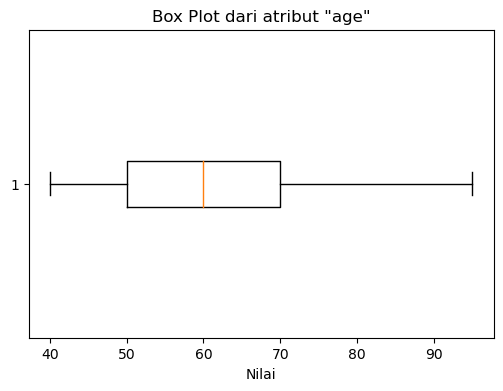

In [42]:
# Buat ouliers dengan diagram box plot
plt.figure(figsize=(6, 4))
plt.boxplot(df_kondisi[selected_attribute], vert=False)
plt.title(f'Box Plot dari atribut "{selected_attribute}"')
plt.xlabel('Nilai')
plt.show()

Pada boxplot diatas Pada boxplot diatas yaitu pada kondisi1 dengan garis yang ditengah dan yang diatas merupakan maximum values dengan nilai 95 dan bawah merupakan minumum values dengan nilai 40, dan garis yang diapit oleh nilai Q3 dan Q1 adalah nilai median yang berada di 60

# K. Modelling

## K.1. Ensemble

### K.1.2. Pelatihan Model

Pelatihan model adalah proses untuk menjalankan sebuah algoritma machine learning untuk dapat mengolah dataset di dalamnya yang sudah terbagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola maupun output tertentu.

In [43]:
# Pisahkan atribut dan label
X = df_kondisi.drop('DEATH_EVENT', axis=1)
y = df_kondisi['DEATH_EVENT'].values

In [44]:
df_kondisi.columns

Index(['age', 'anaemia', 'ejection_fraction', 'diabetes', 'serum_creatinine',
       'serum_sodium', 'platelets', 'creatinine_phosphokinase',
       'high_blood_pressure', 'DEATH_EVENT'],
      dtype='object')

In [45]:
df_kondisi.head()

,age,anaemia,ejection_fraction,diabetes,serum_creatinine,serum_sodium,platelets,creatinine_phosphokinase,high_blood_pressure,DEATH_EVENT
0,75.0,0,20,0,1.9,130,265000.0,582,1,1
2,65.0,0,20,0,1.3,129,162000.0,146,0,1
3,50.0,1,20,0,1.9,137,210000.0,111,0,1
5,90.0,1,40,0,2.1,132,204000.0,47,1,1
6,75.0,1,15,0,1.2,137,127000.0,246,0,1


In [46]:
df_kondisi.tail()

,age,anaemia,ejection_fraction,diabetes,serum_creatinine,serum_sodium,platelets,creatinine_phosphokinase,high_blood_pressure,DEATH_EVENT
291,60.0,0,35,0,1.4,139,133000.0,320,0,0
292,52.0,0,38,1,1.0,140,382000.0,190,0,0
293,63.0,1,35,1,0.9,136,179000.0,103,0,0
294,62.0,0,38,1,1.1,143,155000.0,61,1,0
298,50.0,0,45,0,1.6,136,395000.0,196,0,0


setelah kita melakukan ensemble pada langkah berikutnya kita akan melakukan proses gridsearchCV untuk menghasilkan akurasi yang lebih optimal atau pengukuran akurasi yang terbaik

### Mengoptimalkan model menggunakan GridSearchCV

In [47]:
# Definisikan grid parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'random_state' : [42, 52, 62],
    'min_samples_leaf': [1, 2, 4]
}

# Membuat objek GridSearchCV untuk mencari parameter terbaik untuk RandomForestClassifier
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy', cv=5)
grid_search_rf.fit(X, y)

# Menampilkan parameter terbaik untuk RandomForestClassifier
print("Parameter terbaik RandomForestClassifier:", grid_search_rf.best_params_)

# Menggunakan model RandomForestClassifier yang dioptimalkan sebagai estimator untuk SequentialFeatureSelector
sfs = SFS(grid_search_rf.best_estimator_, k_features=9, forward=True, floating=False, scoring='accuracy', cv=5)

# Melatih model menggunakan data latih
sfs.fit(X, y)

# Menampilkan indeks fitur terpilih
selected_feature_indices = list(sfs.k_feature_idx_)
print("Indeks fitur yang terpilih:", selected_feature_indices)

# Mendapatkan nama fitur yang terpilih
selected_feature_names = list(X.columns[selected_feature_indices])
print("Nama fitur yang terpilih:", selected_feature_names)

Parameter terbaik RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 62}
Indeks fitur yang terpilih: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Nama fitur yang terpilih: ['age', 'anaemia', 'ejection_fraction', 'diabetes', 'serum_creatinine', 'serum_sodium', 'platelets', 'creatinine_phosphokinase', 'high_blood_pressure']


In [48]:
X_fit=df_kondisi[['age', 'anaemia', 'ejection_fraction', 'diabetes', 'serum_creatinine', 'serum_sodium', 'platelets', 'creatinine_phosphokinase', 'high_blood_pressure']]

In [49]:
smote = SMOTE()
X_fit, y = smote.fit_resample(X_fit, y)

In [50]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.2, random_state=42)

In [51]:
scaler = StandardScaler()

In [52]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

### K.1.1. Pendefinisian Model Dengan Random Forest
Mendefinisikan model random forest

In [53]:
# Buat model Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [54]:
# Latih model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
# Memprediksi data uji
y_pred = rf_classifier.predict(X_test)

## Evaluasi Model

In [56]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

Akurasi: 0.83


In [57]:
confusion = confusion_matrix(y_test, y_pred)
print(f'Matriks Konfusi:\n{confusion}')

Matriks Konfusi:
[[30  7]
 [ 4 23]]


True Negative (TN): 30

Jumlah pasien yang sebenarnya tidak mengalami kegagalan jantung dan berhasil diprediksi dengan benar sebagai bukan kegagalan jantung oleh model. False Positive (FP): 7

Jumlah pasien yang sebenarnya tidak mengalami kegagalan jantung tetapi salah diprediksi oleh model sebagai mengalami kegagalan jantung. False Negative (FN): 7

Jumlah pasien yang sebenarnya mengalami kegagalan jantung tetapi salah diprediksi oleh model sebagai tidak mengalami kegagalan jantung. True Positive (TP): 20

Jumlah pasien yang sebenarnya mengalami kegagalan jantung dan berhasil diprediksi dengan benar oleh model sebagai mengalami kegagalan jantung.

In [58]:
classification = classification_report(y_test, y_pred)
print(f'Laporan Klasifikasi:\n{classification}')

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        37
           1       0.77      0.85      0.81        27

    accuracy                           0.83        64
   macro avg       0.82      0.83      0.83        64
weighted avg       0.83      0.83      0.83        64



### Melihat hasil prediksi dengan data aktual

In [59]:
y_test

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1],
      dtype=int64)

In [60]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [61]:
kondisi = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
kondisi.head()

,Actual,Predict
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0


### Membuat Visualisasi Confusion Matrix Random Forest

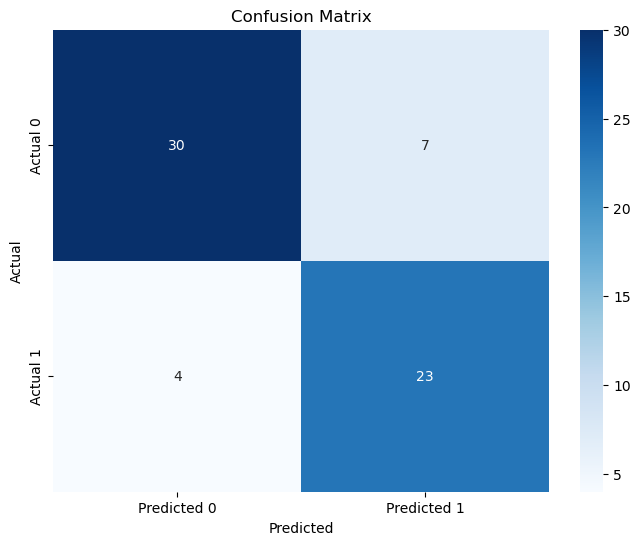

In [62]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

Dan pada confusion matrix diatas kita dapat melihat bahwa warna yg cenderung pekat atau gelat nilainya lebih tinggi dan disini kita melihat bahwa nilai actual lebih pekat dari pada nilai predict, dan nilai tinggi pada actual 0 dan predict 0.

No Skill ROC AUC Score            = 0.5
RandomForestClassifier ROC AUC Score = 0.5175175175175175


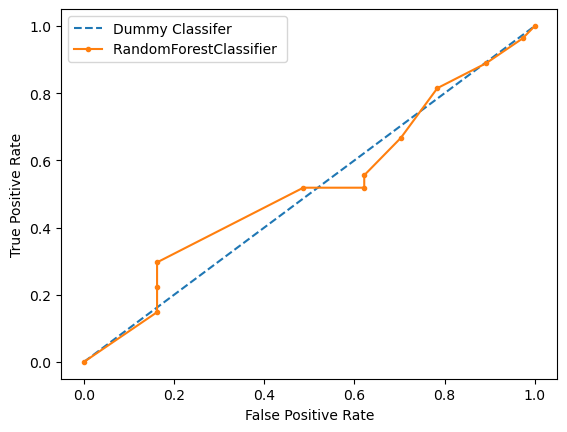

In [63]:
ns_probs = [0 for _ in range(len(y_test))]
rf_probs = rf_classifier.predict_proba(x_test)
rf_probs = rf_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

print('No Skill ROC AUC Score            =', ns_auc)
print('RandomForestClassifier ROC AUC Score =', rf_auc)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer')
plt.plot(rf_fpr, rf_tpr, marker='.', label='RandomForestClassifier ')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

Pada model kali ini kita mendapatkan akurasi adalah 73% dengan konfusi nya [28 9 [8 9]. Dan disini kita mendapatkan recall dan f1-score dengan yg pertama recall 0.76 - 0. 70 dan f1-score nya 077 - 0.69 .

# Model Inference

In [64]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       320 non-null    float64
 1   anaemia                   320 non-null    int64  
 2   ejection_fraction         320 non-null    int64  
 3   diabetes                  320 non-null    int64  
 4   serum_creatinine          320 non-null    float64
 5   serum_sodium              320 non-null    int64  
 6   platelets                 320 non-null    float64
 7   creatinine_phosphokinase  320 non-null    int64  
 8   high_blood_pressure       320 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 22.6 KB


In [65]:
# Memasukkan data pada kolom
input_data = np.array([[58.0, 0, 40, 0, 1.5, 148, 250000.00, 260, 1, ]])
prediction = rf_classifier.predict(input_data)
print('prediksi : ', prediction)

prediksi :  [0]


# Kesimpulan 

Berdasarkan hasil analalisis keseluruhan, dapat ditarik kesimpulan bahwa:

1. Jumlah pasien yang selamat berdasarkan dataset lebih banyak dibanding yang meninggal, yang mana pasien yang selamat berjumlah sekitar 200 pasien dan yang meninggal memiliki jumlah sekitar 100 pasien    
2. Pasien gagal jantung lebih banyak dialami oleh pria dibandingkan wanita. Dimana pasien pria yang mengalami gagal jantung sekitar 60 jiwa dengan persentase 64.6% sedangkan pasien wanita yang mengalami gagal jantung sekitar 30 jiwa dengan persentase 35.4%
3. Berdasarkan heatmap terdapat beberapa kolom yang memiliki korelasi yang tinggi yaitu age, anaemia, creatinine_phosphokinase, high_blood_pressure dan serum_creatinine.
4. Kolom Creatinine_phosphokinase dan platelets memiliki jumlah kategori (unique value) yang sangat banyak yaitu 208 dan 176 yang mana hal itu disebut dengan high cardinality.
5. Untuk data feature, kami menggunakan beberapa atribut pada dataset untuk melakukan prediksi klasifikasi dalam memilih kolom mana yang akan diambil kami menggunakan GridSearchCV untuk mengoptimalkan pemodelannya, adapun kolom yang kami gunakan untuk data feature yaitu: age, anaemia, ejection_fraction, diabetes, serum_creatinine, serum_sodium, platelets,creatinine_phosphokinase, high_blood_pressure.

Karena data yang kami gunakan termasuk kedalam imbalanced data, selanjutnya kami menerapkan Teknik SMOTE untuk menghandling atau memperbaiki imbalanced data tersebut. Pada dataset ini melakukan klasifikasi dengan menggunakan modle random forest yang mana setelah dilakukan evaluasi model, model menghasilkan nilai-nilai berikut :
- Nilai akurasi Model : 0.78
- Nilai precision Model : 0.74
- Nilai recall Model : 0.74
- Nilai f1-score Model : 0.74

# Save Model

In [66]:
import pickle

filename = 'prediksi_kematian.sav'
pickle.dump(rf_classifier, open(filename,'wb'))

In [67]:
df_kondisi

,age,anaemia,ejection_fraction,diabetes,serum_creatinine,serum_sodium,platelets,creatinine_phosphokinase,high_blood_pressure,DEATH_EVENT
0,75.000,0,20,0,1.90,130,265000.00,582,1,1
2,65.000,0,20,0,1.30,129,162000.00,146,0,1
3,50.000,1,20,0,1.90,137,210000.00,111,0,1
5,90.000,1,40,0,2.10,132,204000.00,47,1,1
6,75.000,1,15,0,1.20,137,127000.00,246,0,1
8,65.000,0,65,0,1.50,138,263358.03,157,0,1
11,62.000,0,25,0,0.90,140,253000.00,231,1,1
12,45.000,1,30,0,1.10,137,136000.00,981,0,1
13,50.000,1,38,0,1.10,137,276000.00,168,1,1
14,49.000,1,30,0,1.00,138,427000.00,80,1,0
